<a href="https://colab.research.google.com/github/a-apte/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

### IMPORT PACKAGES

In [0]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')

import seaborn as sns
sns.set(style = "whitegrid")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df_raw = pd.read_csv(url)
print(df_raw.shape) #1460 observations, 81 columns

df_raw.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df_raw.select_dtypes(include=numerics)

print(numeric_df.shape)

numeric_df.head()

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [0]:
numeric_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [0]:
lot_fronterage_median = numeric_df['LotFrontage'].median()

print(lot_fronterage_median)

# replace(0, cf, inplace = True)

numeric_df['LotFrontage'].fillna(0, inplace = True)
numeric_df['GarageYrBlt'].fillna(0, inplace = True)

numeric_df.isnull().sum()

69.0


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [0]:
numeric_df['LotFrontage'].replace(0, lot_fronterage_median, inplace = True)

for i in range(0,len(numeric_df['GarageYrBlt'])):
  if numeric_df['GarageYrBlt'][i] == 0:
    numeric_df['GarageYrBlt'] = numeric_df['YearBuilt']
    
numeric_df['logPrice'] = np.log(numeric_df['SalePrice'])
    
numeric_df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
logPrice         0
dtype: int64

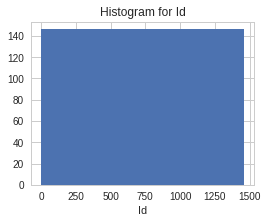

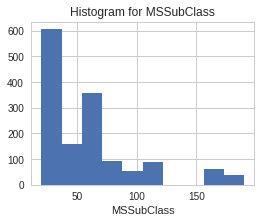

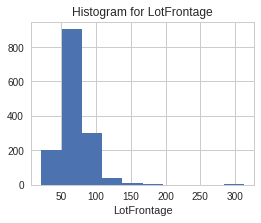

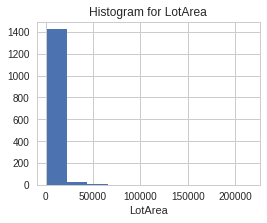

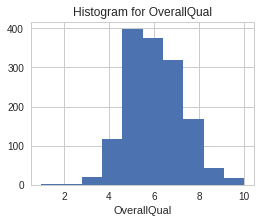

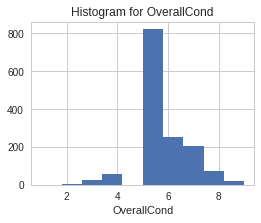

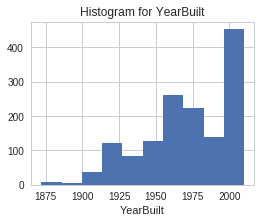

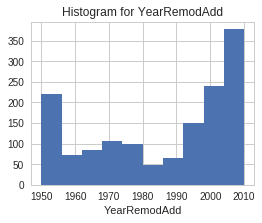

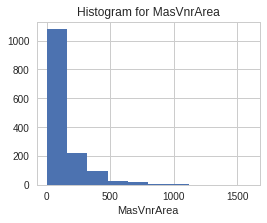

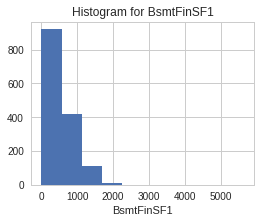

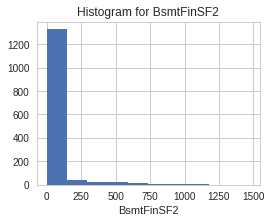

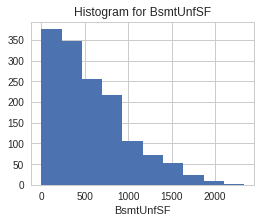

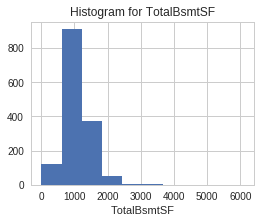

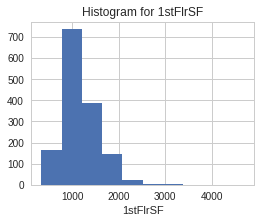

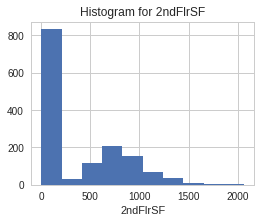

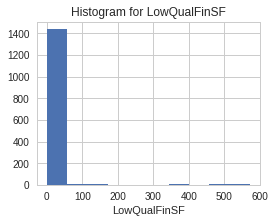

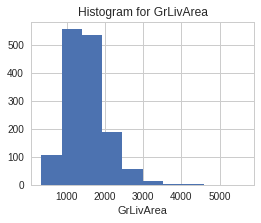

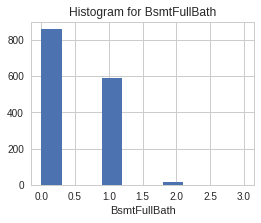

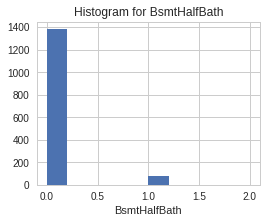

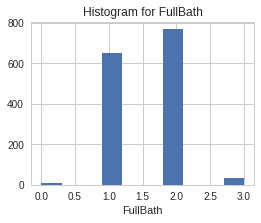

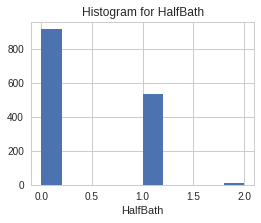

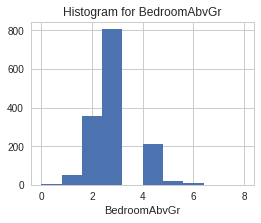

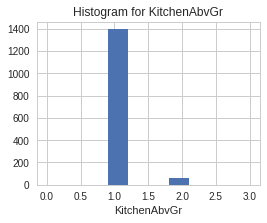

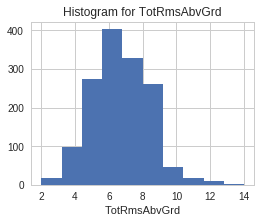

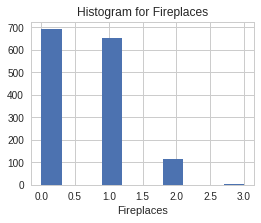

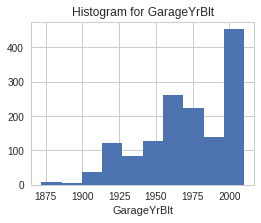

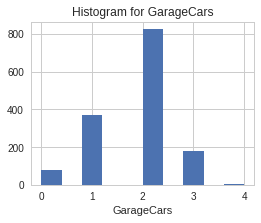

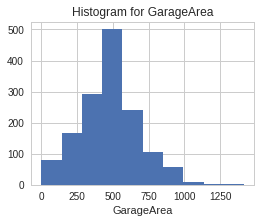

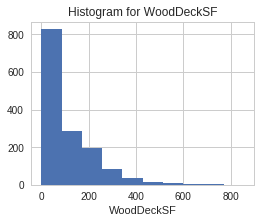

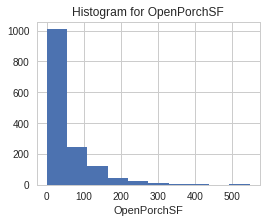

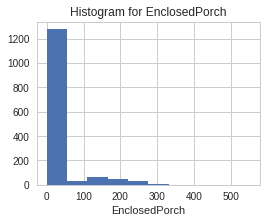

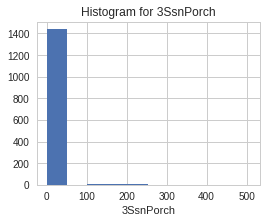

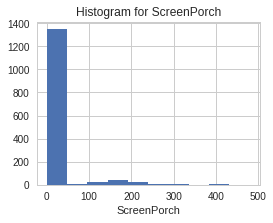

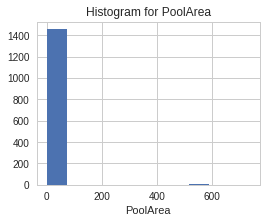

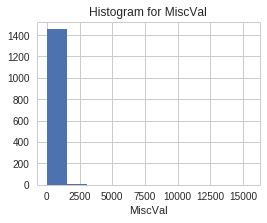

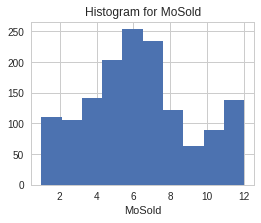

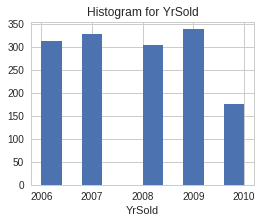

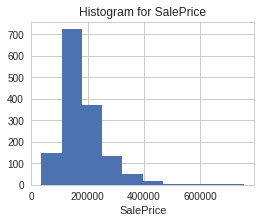

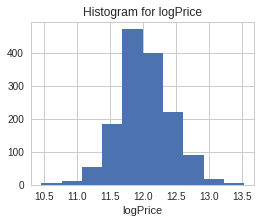

In [0]:
for col in numeric_df.columns:  
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  fig.set_size_inches(4, 3)
#   sns.distplot(numeric_df[col])  # Seaborn broke down here for some reason
  numeric_df[col].hist() 
  ax1.set_xlabel("{}".format(col))
  ax1.set_title("Histogram for {}".format(col))
  plt.show()

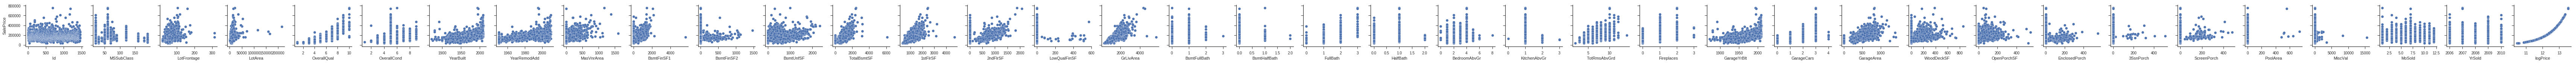

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = numeric_df.columns.drop('SalePrice')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=numeric_df, y_vars=['SalePrice'], x_vars=x_columns)

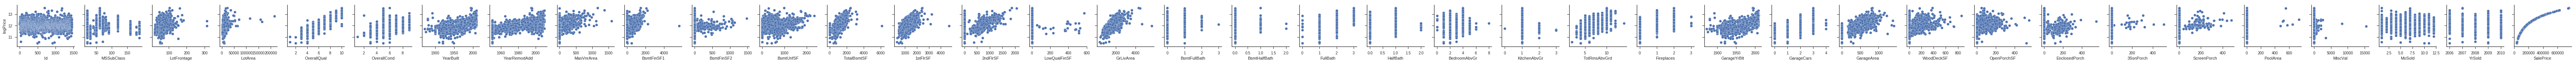

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns_log = numeric_df.columns.drop('logPrice')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=numeric_df, y_vars=['logPrice'], x_vars=x_columns_log)

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

Text(0.5, 1.0, 'Height by Weight')

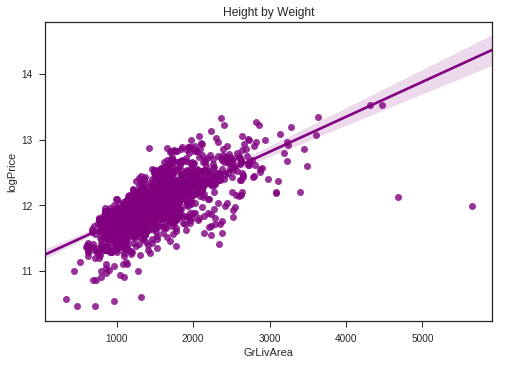

In [0]:
##### Your Code Here #####


sns.regplot('GrLivArea', 'logPrice', data = numeric_df, color='purple').set_title('Height by Weight')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodels.api to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
dropped_columns = ['Id', 'MSSubClass', 'MasVnrArea'] 
new_cols = numeric_df.columns.drop(dropped_columns)

df = numeric_df[new_cols]     #.astype(float)

df.head()



,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logPrice
0,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1915,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


In [0]:
##### Your Code Here #####

# First Pass

y = df['SalePrice']
drop_y = ['SalePrice', 'logPrice']
X = df.drop(drop_y, axis=1)
X = sm.add_constant(X)


print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     188.9
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:41:07   Log-Likelihood:                -17355.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1428   BIC:                         3.494e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.518e+05   1.45e+06      0.105

**BACKWARD ELIMINATION - Remove features that have large p values in the regression. Keep eliminating until all variables are below the p < 0.05 threshold**

In [0]:
# Backward Elimination

X_drop = ['LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'YearRemodAdd', 'GrLivArea', 'PoolArea',
          'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
         'MiscVal', 'MoSold', 'YrSold']  

# '2ndFlrSF', 'BedroomAbvGr'

X2 = X.drop(X_drop, axis=1)

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
##### Your Code Here #####

print(sm.OLS(y, X2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     413.3
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:46:50   Log-Likelihood:                -17368.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1445   BIC:                         3.485e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.388e+05   9.01e+04     -9.312   

**The interpretation of the p values is that with a p-value less than the critical value, one can reject the null hypothesis that the specific slope coefficient is zero. This is confirmed by the 95% confidence intervals that do not have zero in their intervals.**

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

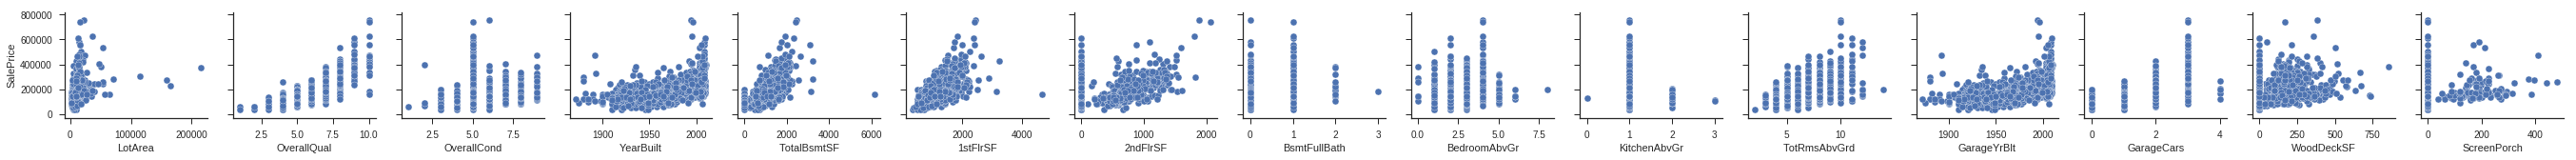

In [0]:
##### Your Code Here #####


df_2 = pd.concat((X2, y), axis = 1)

# df_2.columns

x_columns2 = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'WoodDeckSF', 'ScreenPorch']

sns.pairplot(data=df_2, y_vars=['SalePrice'], x_vars=x_columns2)

# df_2.head()

# z = np.abs(st.zscore(df_2))
# print(z)

# threshold = 3
# print(np.where(z > threshold))

In [0]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
const,1460.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.00,0.0,1.00,3.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0


In [0]:
def outlier_removal(df, col):
  print (df.shape)
  df_x = df[(np.abs(st.zscore(df[col])) < 3)]
  print (df_x.shape)
  return df_x

def outlier_removal2(df, col):
  print (df.shape)
  df_x = df[(np.abs(st.zscore(df[col])) < 3)]
  print (df_x.shape)
  return None

In [0]:
# df_2_x = outlier_removal(df_2, 'LotArea')

# for col in df_2.columns:
#   print(col)
#   outlier_removal2(df_2, col)

In [0]:
df_2.columns

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'WoodDeckSF', 'ScreenPorch', 'SalePrice'],
      dtype='object')

In [0]:
# Q1 = df_2.quantile(0.25)
# Q3 = df_2.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# print (df_2.shape)

rel_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'WoodDeckSF', 'ScreenPorch', 'SalePrice']

df_2 = df_2[rel_cols]

df_2.head()



,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
0,8450,7,5,2003,856,856,854,1,3,1,8,2003,2,0,0,208500
1,9600,6,8,1976,1262,1262,0,0,3,1,6,1976,2,298,0,181500
2,11250,7,5,2001,920,920,866,1,3,1,6,2001,2,0,0,223500
3,9550,7,5,1915,756,961,756,1,3,1,7,1915,3,0,0,140000
4,14260,8,5,2000,1145,1145,1053,1,4,1,9,2000,3,192,0,250000


In [0]:
print(df_2.shape)

df_2_x = df_2[(np.abs(st.zscore(df_2)) < 3).all(axis=1)]

print(df_2_x.shape)

(1460, 16)
(1247, 16)


In [0]:
y = df_2_x['SalePrice']
drop_y = ['SalePrice']
X = df_2_x.drop(drop_y, axis=1)
X = sm.add_constant(X)


print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     617.7
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:29:09   Log-Likelihood:                -14354.
No. Observations:                1247   AIC:                         2.874e+04
Df Residuals:                    1233   BIC:                         2.881e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea          1.4132      0.195      7.263   

**By removing outliers, one sees a dramatic change in all of the coeffiencts. GarageCars seemed to have moved the most.**

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
##### Your Code Here #####

# df_3 = df_2_x

# df_3['logPrice'] = np.log(df_3['SalePrice'])

# df_3.head()

df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logPrice
0,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1915,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


In [0]:
print(df.shape)

df_3 = df[(np.abs(st.zscore(df_2)) < 3).all(axis=1)]

print(df_3.shape)

df_3.head()

(1460, 36)
(1247, 36)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logPrice
0,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1915,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


In [0]:
# Backward Elimination again

# First Pass

y = df_3['logPrice']
drop_y = ['SalePrice', 'logPrice']
X = df_3.drop(drop_y, axis=1)
X['const'] = 1.0
# X = sm.add_constant(X)
# X.head()
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     340.3
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:09:34   Log-Likelihood:                 859.98
No. Observations:                1247   AIC:                            -1658.
Df Residuals:                    1216   BIC:                            -1499.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage       0.0005      0.000      2.416

In [0]:
# Backward Elimination

X_drop = ['BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath',
          'BedroomAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
         'PoolArea','MiscVal', 'MoSold', '1stFlrSF', '2ndFlrSF', 'GrLivArea']  

# '2ndFlrSF', 

X2 = X.drop(X_drop, axis=1)

print(sm.OLS(y, X2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     474.5
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:11:26   Log-Likelihood:                 656.67
No. Observations:                1247   AIC:                            -1281.
Df Residuals:                    1231   BIC:                            -1199.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotFrontage      0.0009      0.000      3.652   

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [0]:
##### Your Code Here #####

from statsmodels.stats.outliers_influence import variance_inflation_factor

# print(X2.columns, '\n\n')

vif = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
# print(vif)

for i, col in enumerate(X2.columns):
  print ("Column {}   VIF: {}".format(col, vif[i]))

Column LotFrontage   VIF: 1.524913525020306
Column LotArea   VIF: 1.6067247243803533
Column OverallQual   VIF: 2.632800982207199
Column OverallCond   VIF: 1.4630099713590354
Column YearBuilt   VIF: inf
Column YearRemodAdd   VIF: 2.2677243637831412
Column BsmtFinSF1   VIF: 1.966362583117043
Column TotalBsmtSF   VIF: 1.8190131734097499
Column BsmtFullBath   VIF: 1.744662524969237
Column FullBath   VIF: 2.0958696453612586
Column KitchenAbvGr   VIF: 0.0
Column Fireplaces   VIF: 1.334738068736877
Column GarageYrBlt   VIF: inf
Column GarageCars   VIF: 5.355448058435649
Column GarageArea   VIF: 4.674133911228126
Column ScreenPorch   VIF: 1.0264086530782013
Column YrSold   VIF: 1.0178454977949982
Column const   VIF: 0.0


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [0]:
drop_vif_col = ['YearBuilt', 'GarageYrBlt']

X3 = X2.drop(drop_vif_col, axis=1)

print(sm.OLS(y, X3).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     482.0
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:18:01   Log-Likelihood:                 627.95
No. Observations:                1247   AIC:                            -1226.
Df Residuals:                    1232   BIC:                            -1149.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotFrontage      0.0009      0.000      3.652   

**By removing high VIF variables, the regression coefficients tend to decrease and the standard errors tend to increase. For the most part, these observations seem to match the intuition.**

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,BsmtFullBath,FullBath,KitchenAbvGr,Fireplaces,GarageCars,GarageArea,ScreenPorch,YrSold
LotFrontage,1.000000,0.554939,0.210544,-0.049651,0.081790,0.134615,0.290542,0.070015,0.153855,NaN,0.219324,0.278059,0.315451,0.022196,0.001683
LotArea,0.554939,1.000000,0.136892,-0.040570,0.014601,0.152603,0.272812,0.077330,0.163695,NaN,0.287781,0.262728,0.296959,0.025846,-0.033229
OverallQual,0.210544,0.136892,1.000000,-0.181806,0.553723,0.163599,0.525244,0.097053,0.634429,NaN,0.365144,0.609063,0.538972,-0.003006,-0.010188
OverallCond,-0.049651,-0.040570,-0.181806,1.000000,-0.005306,-0.018657,-0.186174,-0.028317,-0.248561,NaN,-0.062345,-0.242836,-0.202171,0.051806,0.040806
YearRemodAdd,0.081790,0.014601,0.553723,-0.005306,1.000000,0.084702,0.306143,0.113858,0.517741,NaN,0.090403,0.459343,0.389001,-0.025615,0.042172
BsmtFinSF1,0.134615,0.152603,0.163599,-0.018657,0.084702,1.000000,0.419389,0.632663,0.068106,NaN,0.197259,0.193743,0.238401,0.067862,0.043263
TotalBsmtSF,0.290542,0.272812,0.525244,-0.186174,0.306143,0.419389,1.000000,0.262894,0.359680,NaN,0.298939,0.468802,0.483407,0.059601,0.013092
BsmtFullBath,0.070015,0.077330,0.097053,-0.028317,0.113858,0.632663,0.262894,1.000000,-0.029198,NaN,0.099791,0.115342,0.161730,0.029524,0.086555
FullBath,0.153855,0.163695,0.634429,-0.248561,0.517741,0.068106,0.359680,-0.029198,1.000000,NaN,0.287228,0.543951,0.455492,-0.013446,-0.002087
KitchenAbvGr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


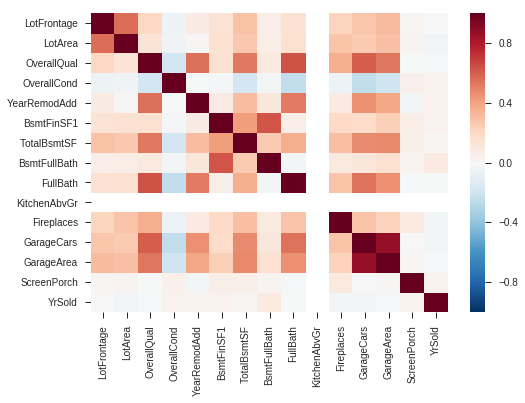

In [0]:
##### Your Code Here #####

no_const = X3.drop('const', axis=1)
sns.heatmap(no_const.corr())
no_const.corr()

## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
##### Your Code Here #####

cols_drop3 = ['KitchenAbvGr', 'GarageCars'] # One variable dropped because of Nan issue

X4 = X3.drop(cols_drop3, axis=1)

print(sm.OLS(y, X4).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     507.1
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:30:22   Log-Likelihood:                 615.34
No. Observations:                1247   AIC:                            -1203.
Df Residuals:                    1233   BIC:                            -1131.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotFrontage      0.0009      0.000      3.542   

**The standard errors increase for some of the variables.**

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [0]:
##### Your Code Here #####

print (sm.OLS(y, X4).fit(cov_type='HC3').summary()) #Robust Standard Error correction

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     362.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:17:04   Log-Likelihood:                 615.34
No. Observations:                1247   AIC:                            -1203.
Df Residuals:                    1233   BIC:                            -1131.
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
LotFrontage      0.0009      0.000      2.703   

**With robust standard errors, the standard errors for some of the features increased. No standard errors decreased except for one.**

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

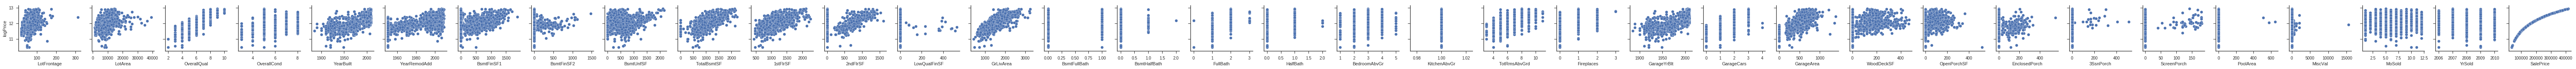

In [0]:
##### Your Code Here #####

# df_3.columns

x_columns3 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

sns.pairplot(data=df_3, y_vars=['logPrice'], x_vars=x_columns3)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


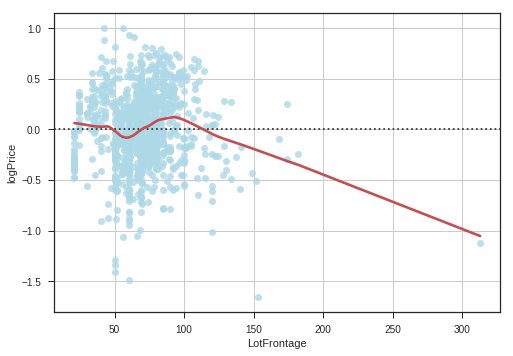

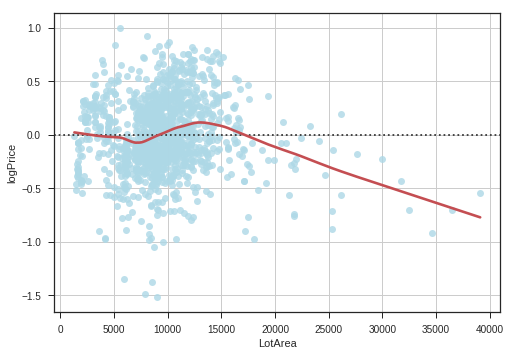

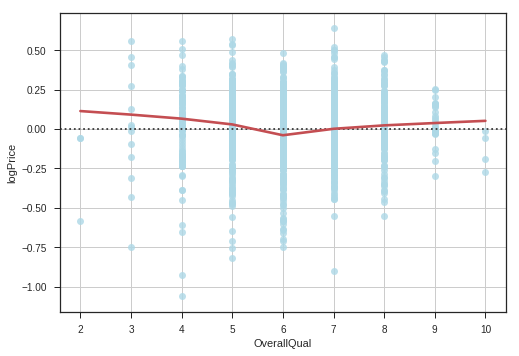

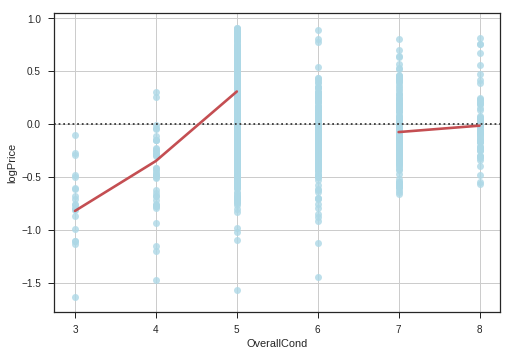

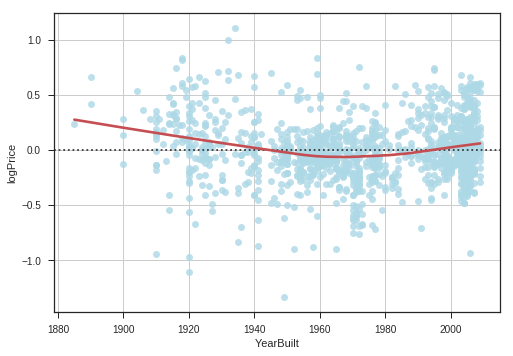

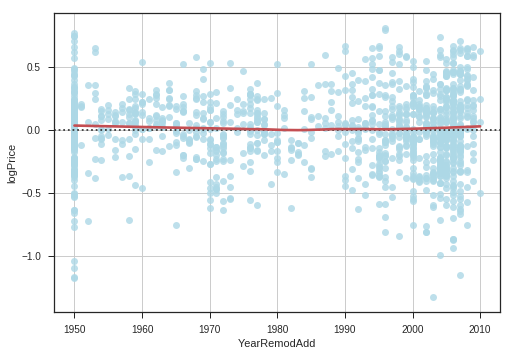

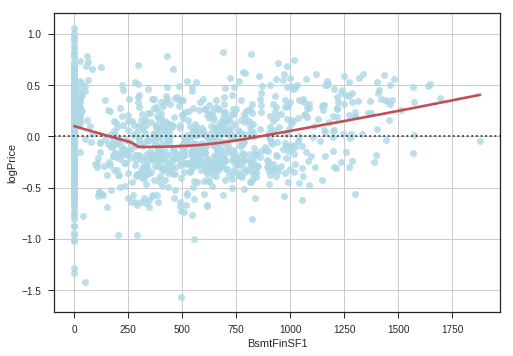

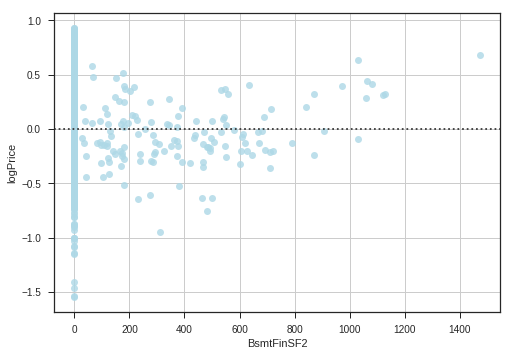

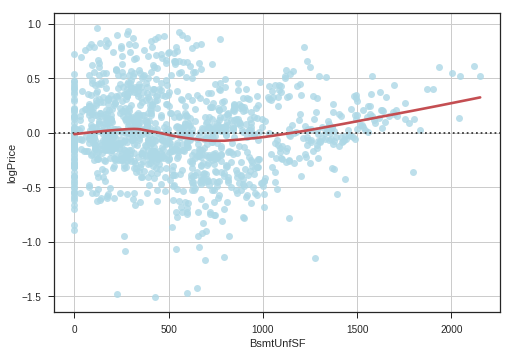

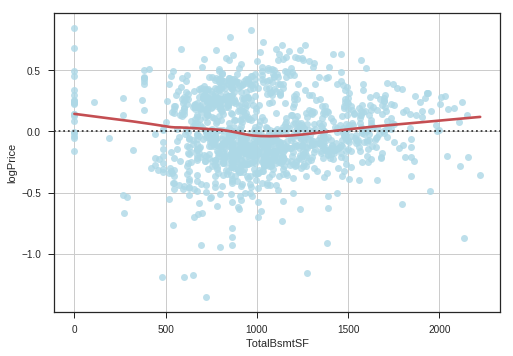

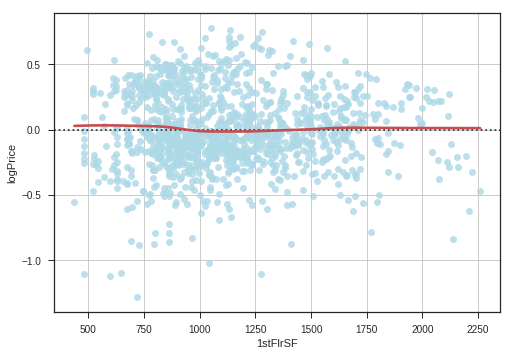

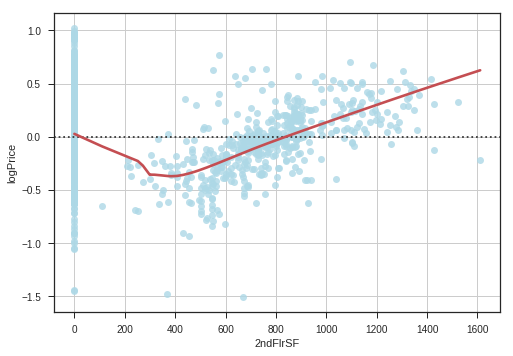

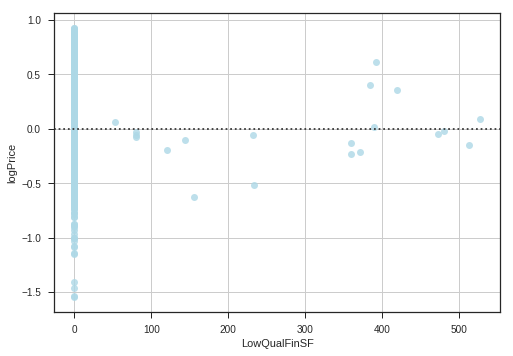

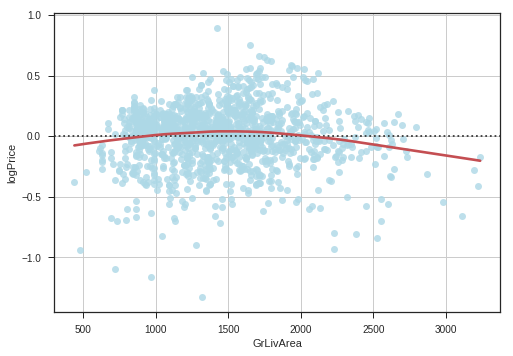

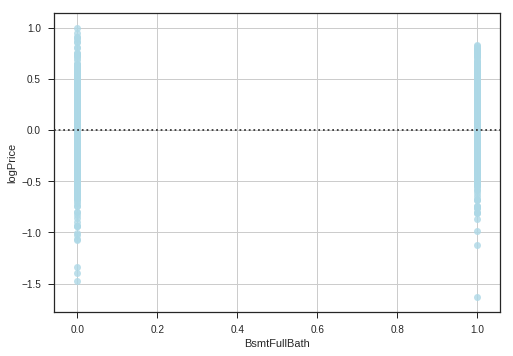

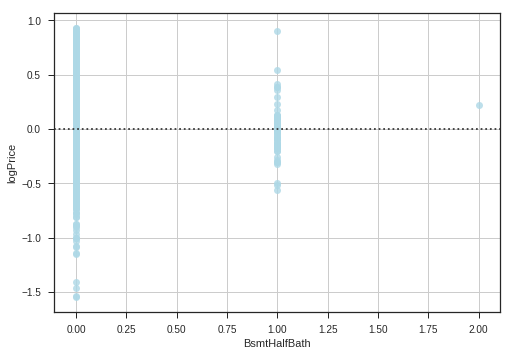

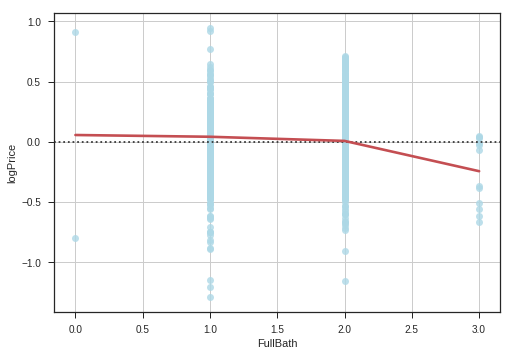

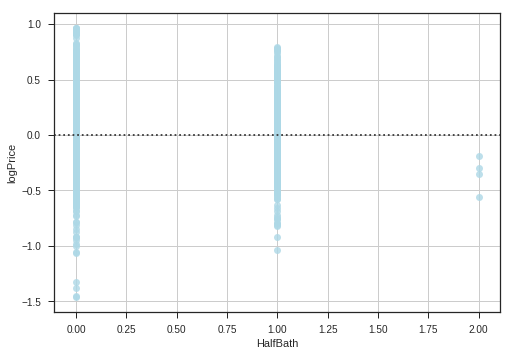

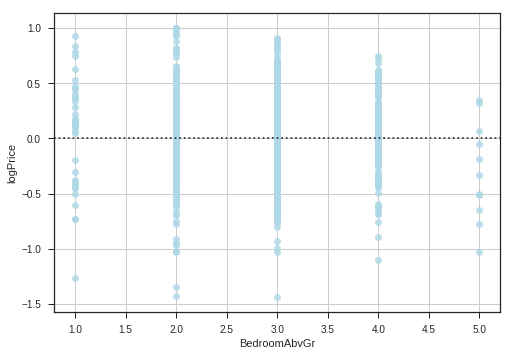

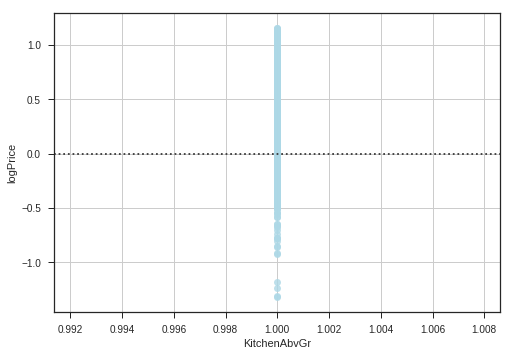

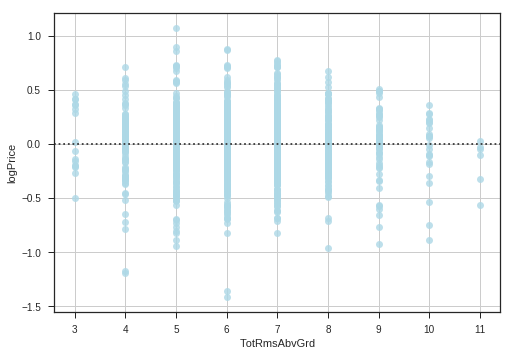

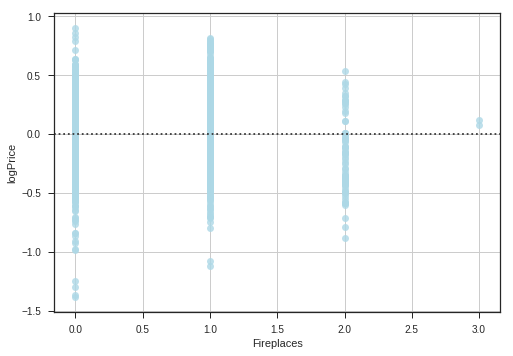

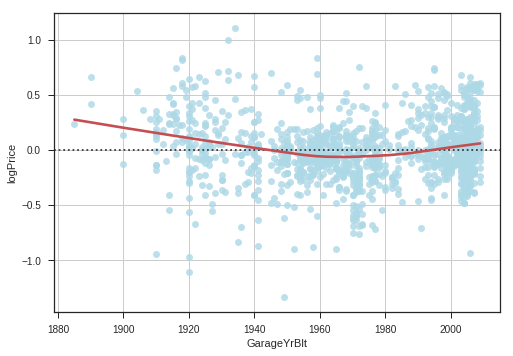

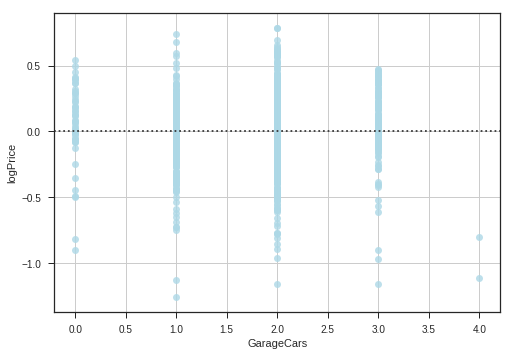

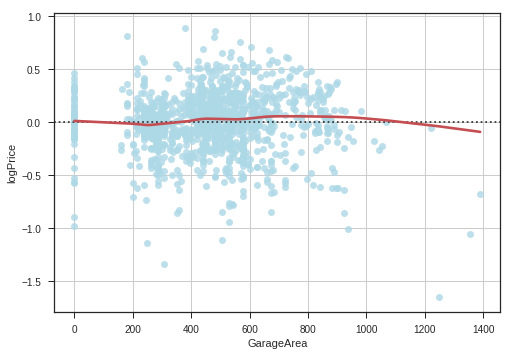

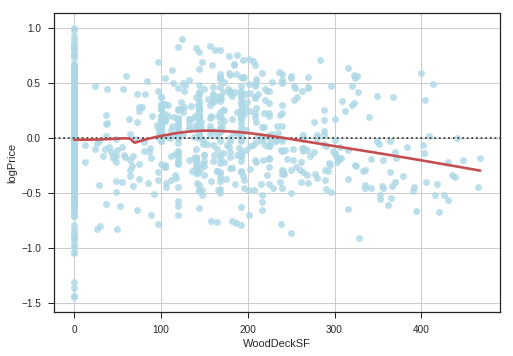

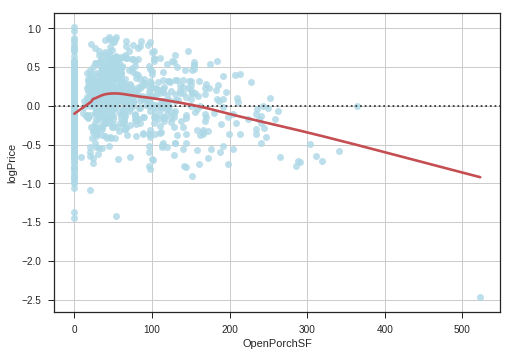

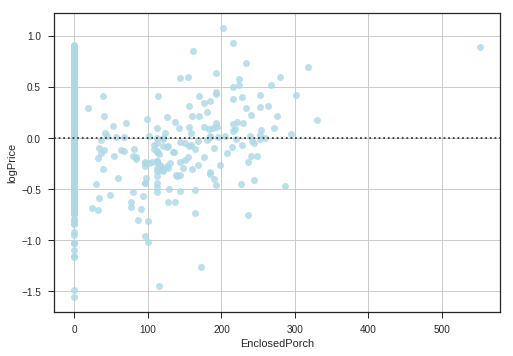

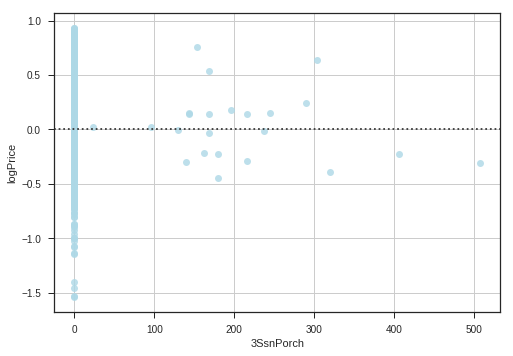

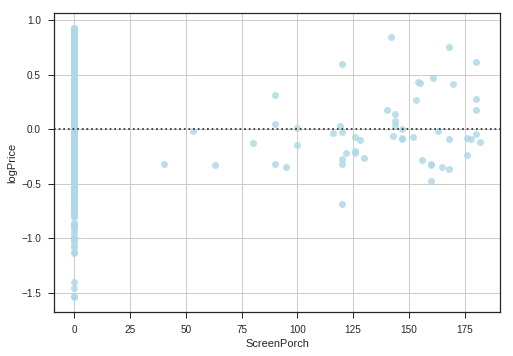

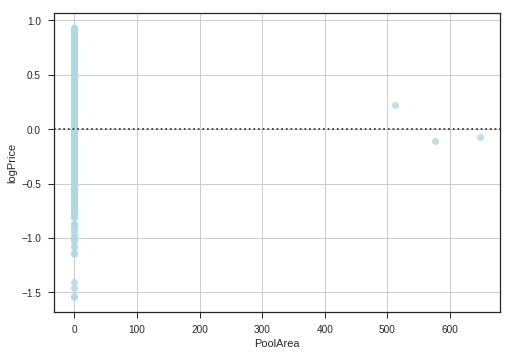

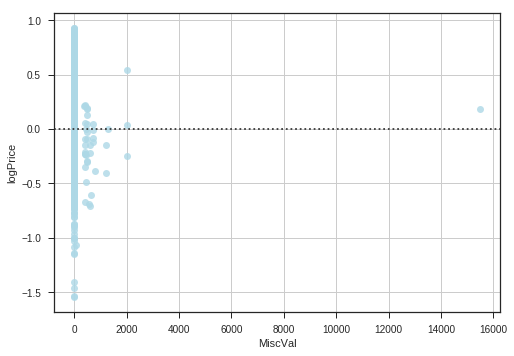

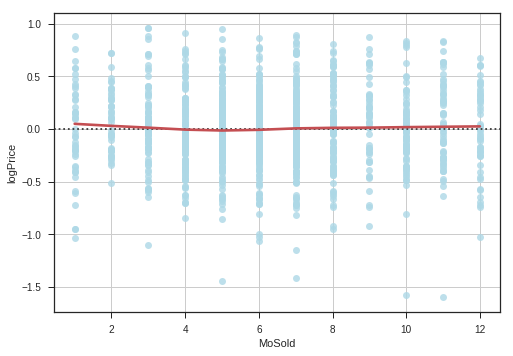

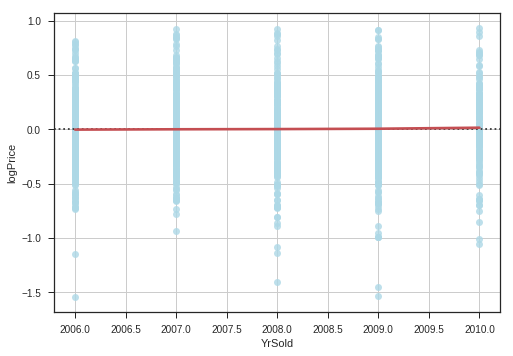

In [0]:
##### Your Code Here #####

x_columns3_2 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

# fig, axs = plt.subplots(ncols=1, nrows=len(x_columns3_2))
for i, col in enumerate(x_columns3_2):
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  plt.grid(True)
  sns.residplot(df_3[col], df_3['logPrice'], lowess=True, color="r", scatter_kws={'color':'lightblue'})

**These plots indicate that YearBuilt and GarageYearBuilt should have polynomial representation in the regression.**

## 2.7 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [109]:
##### Your Code Here #####

df_3.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logPrice
0,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1915,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


In [112]:
# POLYNOMIALS

df_3['GarageYrBlt2'] = df_3['GarageYrBlt']**2
df_3['YearBuilt2'] = df_3['YearBuilt']**2


df_3['const'] = 1.0

df_3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logPrice,GarageYrBlt2,YearBuilt2,const
0,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,4012009,4012009,1.0
1,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,3904576,3904576,1.0
2,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,4004001,4004001,1.0
3,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1915,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,3667225,3667225,1.0
4,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,4000000,4000000,1.0


In [113]:
df_3.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'logPrice', 'GarageYrBlt2', 'YearBuilt2', 'const'],
      dtype='object')

In [114]:
# First Pass

y = df_3['logPrice']

drop_y = ['SalePrice', 'logPrice']
X5 = df_3.drop(drop_y, axis=1)

print (sm.OLS(y, X5).fit(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 4.671e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:41:19   Log-Likelihood:                 868.64
No. Observations:                1247   AIC:                            -1673.
Df Residuals:                    1215   BIC:                            -1509.
Df Model:                          31                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage       0.0005      0.000      2.234

In [116]:
# Backward Elimination

X_drop_5 = ['YearRemodAdd', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
            'BedroomAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
           'PoolArea', 'MiscVal', 'MoSold', 'BsmtFinSF2', 'GrLivArea']

X6 = X5.drop(X_drop_5, axis=1)

print (sm.OLS(y, X6).fit(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 8.532e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:46:37   Log-Likelihood:                 858.36
No. Observations:                1247   AIC:                            -1683.
Df Residuals:                    1230   BIC:                            -1596.
Df Model:                          16                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
LotFrontage      0.0005      0.000      2.318   

**Intuitively, these polynomial variables are illogical yet they are statistically significant. **